# Titanic - The Ideal Passenger

April 14, 1912. You're on the Titanic, five minutes after the famous collision. As it grinds against the ice, every passenger on board is looking back on each factor that led them to be on the ship at that moment. Those same factors, now immortalized in the 887 entries of the titanic.csv dataset, will be what determines their fate in the next 24 hours. Through stastical analysis of the dataframe, we can synthesize the exact combination of factors that maximizes that chance of surival — and perhaps find the luckiest passenger on board along the way.

## Setup
Let's start by importing the basic libraries and data we'll be considering.

In [30]:
# Importing libraries:
import numpy as np #computational ability
import pandas as pd #data manipulation
import seaborn as sns #data vizualization
import matplotlib.pyplot as plt #data vizualization
from IPython.display import display, Image
%matplotlib inline

# Disable warnings:
import warnings
warnings.filterwarnings("ignore")

# Declaring basic dataframe (spreadsheet) variables:
data = pd.read_csv('train.csv')

# Sorting the data into two dataframes, numerical and categorical:
df_num = data[['Age','SibSp','Parch','Fare']]
df_cat = data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

## Age
We can use a pivot table to average out the data in the numerical columns for both survivors and victims.

In [31]:
pd.pivot_table(data, index = 'Survived', values = ['Age'])

,Age
Survived,
0,30.626179
1,28.343690


### Age: 28
The mean age of the survivors was 28. This is the ideal age for our passenger.

## Sex
We know that our ideal passenger is 28 years old. Let's isolate the passengers around this age and see whether men or women survived more.

In [32]:
# Isolate only the passengers aged 26-30: 
ppl28 = data[data['Age']>25][df_num['Age']<31]

# Calculate survival rates:
print('Male: ' + str(round(((len(ppl28[ppl28['Sex']=='male'][ppl28['Survived']==1].index)/len(ppl28[ppl28['Sex']=='male'].index))*100), 0)) + '% Survival Rate')
print('Female: ' + str(round(((len(ppl28[ppl28['Sex']=='female'][ppl28['Survived']==1].index)/len(ppl28[ppl28['Sex']=='female'].index))*100), 0)) + '% Survival Rate')

Male: 21.0% Survival Rate
Female: 73.0% Survival Rate


Female passengers were almost three times as likely to survive.
### Sex: Female

## Fare
We want to see the average fare paid by survivors. However, the statistical mean is being skewed by a few high paying survivors, and the mode doesn't necessarily represent the data cluster. We will instead use the median to find the center of the data and our ideal fare.

In [33]:
round(data[data['Survived']==1].Fare, 0).median()

26.0

### Fare: ~$26

## Number of Companions
For each passegner, ParCh represents the number of parents/children traveling with them. For a younger passenger, a higher Parch would be a benefit as parents could help ensure their survival. However, as the age of the passenger increases, a higher ParCh becomes a liability as it becomes the passenger's responsibility to prioritize their family.

Since we know the sex and age of our ideal passenger, we will isolate all the female passengers close to 28 years old. We will then calculate the survival rate for each possible ParCh value in the dataset.

In [34]:
# Isolate female passengers from previous dataframe:
fem28 = ppl28[ppl28['Sex']=='female']

# Calculate survival rates for each possible ParCh value:
for i in fem28['Parch'].unique():
    print(str(i) + ':')
    print(str(round((((len(fem28[fem28['Parch']==i][fem28['Survived']==1].index))/(len(fem28[fem28['Parch']==i].index)))*100),0))+'% Survival Rate')
    print()

# Calculate sample size of ParCh=2
print('Number of 28-year-old women with ParCh of two: ' + str(len(fem28[fem28['Parch']==2].index)) + ' passengers.')

0:
83.0% Survival Rate

2:
100.0% Survival Rate

1:
20.0% Survival Rate

4:
0.0% Survival Rate

Number of 28-year-old women with ParCh of two: 2 passengers.


Although it looks like a ParCh value of 2 guarantees survival, a closer look at the data reveals that there were only two 28-year-old women with a ParCh of 2. This is not a large enough sample size to make a generalization about the population.

Instead, let's repeat the process with the concatenated data fem28 sets where ParCh=1 and ParCh=2. This will show the real effect of ParCh on our survival rate.

In [35]:
print('Expanded ParCh Survival Rate: '+str(round((((len(fem28[fem28['Parch']==1][fem28['Survived']==1].index)+len(fem28[fem28['Parch']==2][fem28['Survived']==1].index))/(len(fem28[fem28['Parch']==1].index)+len(fem28[fem28['Parch']==2].index)))*100),0))+'%')

Expanded ParCh Survival Rate: 43.0%


We can see that having no parents or children accompanying our passenger will almost double their chance of survival.
### ParCh = 0

We can follow a similar process with SibSp.

In [36]:
# Calculate survival rates for each possible ParCh value:
for i in fem28['SibSp'].unique():
    print(str(i) + ':')
    print(str(round((((len(fem28[fem28['SibSp']==i][fem28['Survived']==1].index))/(len(fem28[fem28['SibSp']==i].index)))*100),0))+'% Survival Rate')
    print()

# Calculate sample sizes of SibSp=1 and SibSp=3:
print('Number of 28-year-old women with SibSp of one: ' + str(len(fem28[fem28['SibSp']==1].index)) + ' passengers.')
print('Number of 28-year-old women with SibSp of three: ' + str(len(fem28[fem28['SibSp']==3].index)) + ' passengers.')

0:
84.0% Survival Rate

1:
45.0% Survival Rate

3:
100.0% Survival Rate

Number of 28-year-old women with SibSp of one: 11 passengers.
Number of 28-year-old women with SibSp of three: 1 passengers.


We have another sample size issue -- only one passenger had a SibSp equaling 3. We'll consider that passenger an outlier, and focus only one the eleven passengers with a SibSp value of 1. Just like with ParCh, it appears that a higher SibSp was a liability for 28-year-old women.
### SibSp = 0

## Title
We can find the title of the passengers in the names from after the comma to before the period.

Since our ideal passenger is female, we can disregard prefixes like 'Mr.' and focus only on relevant titles.

In [37]:
# Isolate title from name:
data['name_title'] = data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Calculate survival rates for each title:
for i in data['name_title'].unique():
    print(str(i)+': ' + str(round((((len(data[data['name_title']==i][data['Survived']==1].index))/(len(data[data['name_title']==i].index)))*100),0))+'% Survival Rate')
print()

# Calculate sample sizes:
print('Count of Mrs: ' + str(len(data[data['name_title']=='Mrs'].index)) + ' passengers.')
print('Count of Miss: ' + str(len(data[data['name_title']=='Miss'].index)) + ' passengers.')  
print('Count of Dr: ' + str(len(data[data['name_title']=='Dr'].index)) + ' passengers.')  
print('Count of Mme: ' + str(len(data[data['name_title']=='Mme'].index)) + ' passengers.')
print('Count of Ms: ' + str(len(data[data['name_title']=='Ms'].index)) + ' passengers.')
print('Count of Lady: ' + str(len(data[data['name_title']=='Lady'].index)) + ' passengers.')
print('Count of Mlle: ' + str(len(data[data['name_title']=='Mlle'].index)) + ' passengers.')
print('Count of the Countess: ' + str(len(data[data['name_title']=='the Countess'].index)) + ' passengers.')


Mr: 16.0% Survival Rate
Mrs: 79.0% Survival Rate
Miss: 70.0% Survival Rate
Master: 57.0% Survival Rate
Don: 0.0% Survival Rate
Rev: 0.0% Survival Rate
Dr: 43.0% Survival Rate
Mme: 100.0% Survival Rate
Ms: 100.0% Survival Rate
Major: 50.0% Survival Rate
Lady: 100.0% Survival Rate
Sir: 100.0% Survival Rate
Mlle: 100.0% Survival Rate
Col: 50.0% Survival Rate
Capt: 0.0% Survival Rate
the Countess: 100.0% Survival Rate
Jonkheer: 0.0% Survival Rate

Count of Mrs: 125 passengers.
Count of Miss: 182 passengers.
Count of Dr: 7 passengers.
Count of Mme: 1 passengers.
Count of Ms: 1 passengers.
Count of Lady: 1 passengers.
Count of Mlle: 2 passengers.
Count of the Countess: 1 passengers.


We can only really consider the Mrs. and Miss titles. Let's do just that, and add the one Ms to Miss.

In [38]:
print('Mrs: ' + str(round((((len(data[data['name_title']=='Mrs'][data['Survived']==1].index))/(len(data[data['name_title']=='Mrs'].index)))*100),0))+'% Survival Rate')
print('Miss: ' + str(round((((len(data[data['name_title']=='Miss'][data['Survived']==1].index)+1)/(len(data[data['name_title']=='Miss'].index)+1))*100),0))+'% Survival Rate')

Mrs: 79.0% Survival Rate
Miss: 70.0% Survival Rate


Our ideal passenger will have the title of Mrs. This is s little ironic as we determined earlier that, in the sinking of the Titanic, having a spouse is a liability. Perhaps our passenger is widowed, and extremely devoted to her late husband.
### Title: Mrs.

## Ticket Class

There were three ticket classes for the passengers: 1, 2, and 3. Let's vizualize the distribution among the passengers as a barplot.

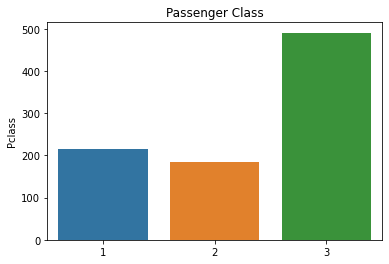

In [39]:
sns.barplot(x=df_cat['Pclass'].value_counts().index, y=df_cat['Pclass'].value_counts()).set_title('Passenger Class')
plt.show()

The majority of passengers were in third class. This might have been the ticket class for the lower socioeconomic class. Let's now calculate the survival rates for each class.

In [40]:
for i in df_cat['Pclass'].unique():
    print('Class '+str([i])+': '+str(round((((len(data[data['Pclass']==i][data['Survived']==1].index))/(len(data[data['Pclass']==i].index)))*100),0))+'% Survival Rate')

Class [3]: 24.0% Survival Rate
Class [1]: 63.0% Survival Rate
Class [2]: 47.0% Survival Rate


First Class had the highest survival rate. This will be the ideal ticket class for our passenger.
### Ticket Class = 1

## Cabin Section
Each passenger had a different cabin, but they were grouped into different sections (A, B, C, etc.) that would have been close together. Let's organize our cabin numbers into their sections. We'll then make a bar plot like before.

In [41]:
data['cabin_section'] = data.Cabin.apply(lambda x: str(x)[0])

For some passengers, we don't have cabin data. Their section is showing up as 'n', which we can consider null. Let's clean these values from the data.

In [42]:
cabin_count_won = data['cabin_section'][data['cabin_section'] != 'n'].reset_index(drop=True)

Like before, let's make a bar plot visualization of the data to help with analysis.

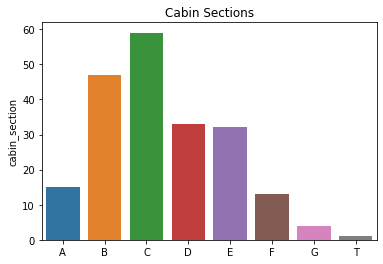

In [43]:
ccw_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
sns.barplot(x=cabin_count_won.value_counts().index, y=cabin_count_won.value_counts(), order=ccw_order).set_title('Cabin Sections')
plt.show()

Most passengers were in Cabin Section C. Let's see which section had the highest survival rate.

In [44]:
for i in data['cabin_section'].unique():
    print('Cabin Section '+str([i])+': '+str(round((((len(data[data['cabin_section']==i][data['Survived']==1].index))/(len(data[data['cabin_section']==i].index)))*100),0))+'% Survival Rate')

Cabin Section ['n']: 30.0% Survival Rate
Cabin Section ['C']: 59.0% Survival Rate
Cabin Section ['E']: 75.0% Survival Rate
Cabin Section ['G']: 50.0% Survival Rate
Cabin Section ['D']: 76.0% Survival Rate
Cabin Section ['A']: 47.0% Survival Rate
Cabin Section ['B']: 74.0% Survival Rate
Cabin Section ['F']: 62.0% Survival Rate
Cabin Section ['T']: 0.0% Survival Rate


Sections B, D, and E are pretty close in survival rate. According to the bar plot, each of the three cabins have sufficient sample sizes, so all three can be assessed. Out of the three, D was the highest with a 76% survival rate.
### Cabin Section D

## Port of Departure
The final piece to our story is where our passenger departed from. There were three ports: Cherbourg, Queenstown, and Southampton. We'll use a pivot table to consider the data.

In [16]:
pd.pivot_table(data, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


Cherbourg (represented by C) is the only port with more survived than died. Perhaps this port was from a higher class area.
### Port: Cherbourg

# The Luckiest Passenger - Mrs. Anna Abelson

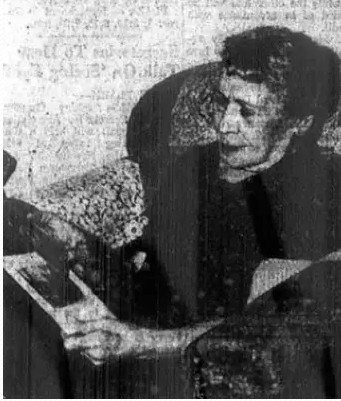

In [46]:
display(Image(filename='anna.jpeg'))

## **Mrs. Anna Abelson (Age 28)**
#### Cabin D Class 2
#### Cherbourg
#### 0 children, late husband
#### $24